<a href="https://colab.research.google.com/github/Dantae-Jekins/comp_cient./blob/main/taylor/taylor_secant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Séries de taylor - Secante
Aproximação da função de secante através das séries de taylor

#### Código, conteúdos e fórmula utilizada
- Combinações 
- Fatoriais
- Números de Euler


Fórmula de Taylor

$$\sum_{n=0}^{∞} \frac{f^{'n}(a)}{n!} ⋅ (x-a)^n$$

Resolução das derivadas da Secante para $a→0$

$
f(0) =\sec\left(0\right) = 1
$

$
\frac{df}{dx} =\sec\left(0\right)\tan\left(0\right) = 0
$

$
\frac{d^2f}{dx^2} =\sec\left(0\right)\tan^2\left(0\right)+\sec^3\left(0\right) = 1
$

$
\frac{d^3f}{dx^3} = \sec\left(0\right)\tan^3\left(0\right)+5\sec^3\left(0\right)\tan\left(0\right) = 0
$

$
\frac{d^4f}{dx^4} = \sec\left(0\right)\tan^4\left(0\right)+18\sec^3\left(0\right)\tan^2\left(0\right)+5\sec^5\left(0\right) = 5
$

$
\frac{d^5f}{dx^5} = \sec\left(a\right)\tan^5\left(a\right)+58\sec^3\left(a\right)\tan^3\left(a\right)+61\sec^5\left(a\right)\tan\left(a\right) ...
$

<br>
Então, aplicadas em a = 0, nós temos uma ordem equivalente à seguinte:

**Para todo n ímpar: $$f^{'n}(0) = 0$$**
**Para todo n par: $$f^{'n}(0) = |E_n|$$**
Seja $E_n$ a série zig-zag do número de Euler

Então, montando a fórmula final temos
$$\sum_{n=0}^{∞} \frac{|E_{2n}|}{2n!} ⋅ x^{2n}$$

In [ ]:
import numpy as np;


In [ ]:
_j_facts = np.empty(2, dtype=object);
_j_facts[0] = 1;
_j_facts[1] = 1;
_j_maxfact = 1;

"""Fatorial otimizado"""
def _j_fact(val) -> int:
    global _j_facts;
    global _j_maxfact;
    if (val <= _j_maxfact):
        return _j_facts[val];
    
    else:
        for i in range(_j_maxfact+1, val+1):
            mult = i*_j_facts[i-1];
            _j_facts = np.append(_j_facts, mult);
        _j_maxfact = val;
        return _j_facts[val];

In [ ]:
""" Combinação simples (N P)"""
def comb(N, P) -> int:
    return _j_fact(N) // (_j_fact(P)*_j_fact(N - P)); # comb sempre retorna um inteiro


Fórmula do número de Euler usada
$$
E_{2n} = (2n + 1) \cdot \sum_{l=1}^{2n} (-1)^{l} \cdot \frac{1}{2^{l}(l + 1)} \cdot \binom{2n}{l} \sum_{q=0}^{l} \binom{l}{q} \cdot (2q - l)^{2n}
$$

In [ ]:
""" Números de euler"""
def euler(val) -> int:
    # tratar erro
    if val == 0: return 1;
    elif (val%2) != 0: return 0;

    N = val;
    mult = (N + 1);
    soma = 0;
    for l in range(1, N+1):
        itema = ((-1)**l);
        itemb = (1/((2**l)*(l+1)));
        itemc = comb(N, l);
        itemd = 0;
        for q in range(0, l+1):            
            itemd += comb(l, q)* ((2*q -  l))**N;
        
        soma += itema*itemb*itemc*itemd;    

    return round(mult*soma);



In [ ]:
def secant(val):
    return 1/np.cos(val);

__secant_table = {
    0: 1,
    
    np.pi/6: 2/np.sqrt(3),
    np.pi/4: 2/np.sqrt(2),
    np.pi/3: 2,
    
    np.pi/2: None,
    
    2*np.pi/3: -2,
    3*np.pi/4: -2/np.sqrt(2),
    5*np.pi/6: -2/np.sqrt(3),
    
    np.pi: -1,
    
    7*np.pi/6: -2/np.sqrt(3),
    5*np.pi/4: -2/np.sqrt(2),
    4*np.pi/3: -2,

    3*np.pi/2: None,

    5*np.pi/3: 2,
    7*np.pi/4: 2/np.sqrt(2),
    11*np.pi/6: 2/np.sqrt(3),
}

def taylor_secante(val, inf) -> float:
    if val in __secant_table:
        return __secant_table[val];
    
    retorno = 0;
    for i in range(0, inf+1):
        retorno += (max(euler(i), -euler(i))/_j_fact(i)) * val**(i);
    return retorno; 

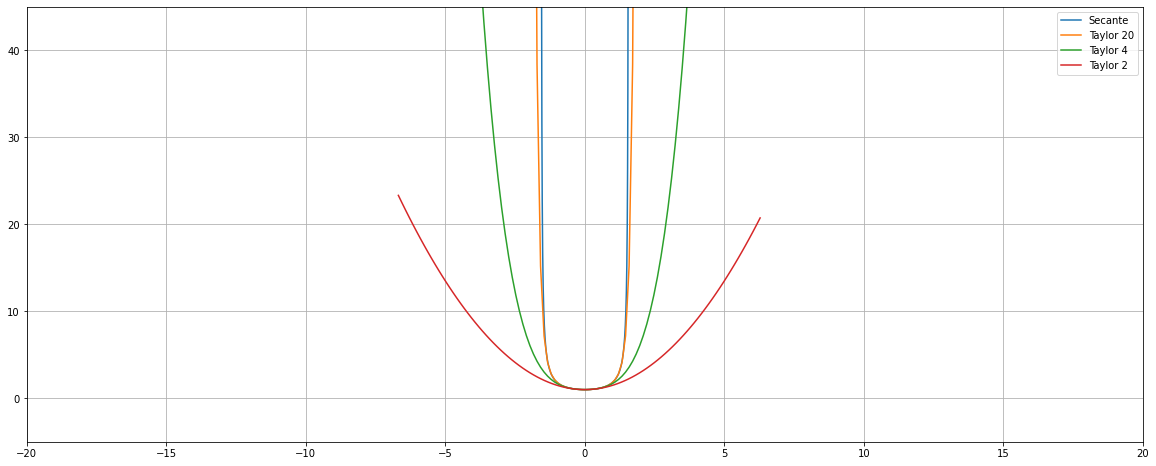

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = [ #definir os x's da função para não bugar o gráfico
    np.linspace(-np.pi/2, np.pi/2, 1000) #x da secante
    ,np.linspace(-np.pi*2, np.pi*2, 100) # taylor n = 20
    ,np.linspace(-np.pi*2, np.pi*2, 100) # taylor n = 4
    ,np.linspace(-np.pi*2 - 0.4, np.pi*2, 100) # taylor n = 2
    ]

y = [ #os y's
    secant(x[0])
    ,taylor_secante(x[1], 20)
    ,taylor_secante(x[2], 4)
    , taylor_secante(x[3], 2)
    ];

lens = [
    "Secante"
    ,"Taylor 20"
    ,"Taylor 4"
    ,"Taylor 2"
]


fig, ax = plt.subplots()
fig.set_size_inches(20,8)
for i in range(0, len(x)):
  ax.plot(x[i], y[i], label=lens[i]);
plt.ylim([-5,45]); # x axis
plt.xlim([-20, 20]);
ax.legend();

ax.grid()